In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns

import sklearn # Importamos la librería sklearn
from sklearn import model_selection # Importamos la librería model_selection

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection # Importamos la librería model_selection
from sklearn.metrics import classification_report # Importamos la librería classification_report
from sklearn.metrics import confusion_matrix # Importamos la librería confusion_matrix
from sklearn.metrics import accuracy_score # Importamos la librería accuracy_score

# Guardamos varios tipos de algoritmos:

from sklearn.cluster import KMeans # Importamos la librería de los k-means
from sklearn.linear_model import LogisticRegression # Importamos la librería de la regresión logística
from sklearn.tree import DecisionTreeClassifier # Importamos la librería del árbol de decisión
from sklearn.neighbors import KNeighborsClassifier # Importamos la librería de los vecinos más cercanos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Importamos la librería del análisis discriminante lineal
from sklearn.naive_bayes import GaussianNB # Importamos la librería del clasificador de Bayes
from sklearn.svm import SVC # Importamos la librería del clasificador de máquinas de vectores de soporte
from sklearn.ensemble import RandomForestClassifier # Importamos la librería del clasificador de bosques aleatorios




Este código importa algunas bibliotecas y módulos que se utilizarán en el script.

    pandas es una biblioteca de análisis de datos que proporciona estructuras de datos y herramientas para manipular y analizar datos.
    os es un módulo que proporciona funciones para interactuar con el sistema operativo.
    matplotlib es una biblioteca de gráficos que permite crear gráficos y visualizaciones de datos. pyplot, que se importa con el alias plt, es un módulo de matplotlib que proporciona funciones para crear gráficos y visualizaciones.
    numpy es una biblioteca de cálculo científico que proporciona funciones y estructuras de datos para realizar cálculos numéricos de forma eficiente.
    glob es un módulo que proporciona funciones para hacer coincidir archivos con patrones utilizando caracteres comodín.
    seaborn es una biblioteca de visualización de datos que proporciona funciones y estilos para crear gráficos y visualizaciones de datos de forma más atractiva.

El módulo sklearn.model_selection proporciona funciones para dividir conjuntos de datos en conjuntos de entrenamiento y prueba.

Los módulos sklearn.preprocessing proporcionan funciones para normalizar, escalar y robustecer conjuntos de datos.

El módulo sklearn.cluster proporciona funciones para agrupar conjuntos de datos utilizando el algoritmo de k-means.

In [2]:

list_of_files = glob.glob('../media/data/*')
latest_file = max(list_of_files, key=os.path.getctime)


data = pd.DataFrame()
data = pd.read_csv(latest_file,
                        sep=',', encoding='UTF-8', low_memory=False)
#os.remove('media/data/sensor.csv')


Este código utiliza la función glob para obtener una lista de archivos en el directorio '../media/data/' que cumplan con el patrón especificado. En este caso, el patrón especificado es '*', que coincide con cualquier nombre de archivo.

Luego, se utiliza la función max con la clave os.path.getctime para obtener el archivo más recientemente modificado en la lista de archivos.

A continuación, se crea un DataFrame de pandas vacío llamado data y se lee el archivo más recientemente modificado en el DataFrame con la función pd.read_csv. La función read_csv toma varios argumentos, como sep para especificar el delimitador de campo, encoding para especificar el juego de caracteres utilizado en el archivo y low_memory para evitar problemas de memoria al leer archivos muy grandes.

In [3]:

def registros():
    # count number of rows
    registros = data.shape[0]
    print("¿Cuántas columnas en el dataset hay? ", registros)
    return registros

def variables():
    # count number of rows
    variables = data.shape[1]
    print("¿Cuántos variables en el dataset hay? ", variables)
    return variables

def sensores():
    # count number of columns that column names begin with 'sensor'
    sensores = data.filter(regex='sensor').shape[1]
    print("¿Cuántos sensores de prueba hay? ", sensores)
    return sensores

# number of missing values in total
def missing_values():
    missing_values = data.isnull().sum().sum()
    print("¿Cuántos valores faltantes hay en el dataset? ", missing_values)
    return missing_values
    


registros()
variables()
sensores()
missing_values()

¿Cuántas columnas en el dataset hay?  220320
¿Cuántos variables en el dataset hay?  55
¿Cuántos sensores de prueba hay?  52
¿Cuántos valores faltantes hay en el dataset?  344574


344574

    La función registros imprime y devuelve el número de filas (registros) en el conjunto de datos. Esto se hace utilizando el método shape de pandas, que devuelve una tupla con el número de filas y el número de columnas. Para obtener el número de filas, se utiliza la posición 0 de la tupla.

    La función variables imprime y devuelve el número de columnas (variables) en el conjunto de datos. Esto se hace de la misma manera que en la función registros, utilizando la posición 1 de la tupla devuelta por el método shape.

    La función sensores imprime y devuelve el número de columnas cuyos nombres comienzan con "sensor". Esto se hace utilizando el método filter de pandas y una expresión regular para seleccionar solo las columnas que cumplen con el patrón especificado. Luego, se utiliza el método shape de nuevo para obtener el número de columnas seleccionadas.

    La función missing_values imprime y devuelve el número total de valores faltantes en el conjunto de datos. Esto se hace utilizando el método isnull para seleccionar solo los valores faltantes y luego sumando los resultados utilizando el método sum dos veces.

Es importante tener en cuenta que estas funciones no realizan ninguna acción por sí mismas, sino que simplemente imprimen y devuelven los resultados. Para utilizar estas funciones, debes llamarlas y procesar los resultados de alguna manera. Por ejemplo, podrías guardar el resultado de la función registros en una variable y luego utilizarla para realizar un cálculo o imprimirla en la pantalla.

In [4]:

# we see that one column (sensor_15) has no values therefore we will delete that column 
data_clean = data.drop('sensor_15', axis = 1)
# Al sensor 50 también le falta el 34,95% de los datos, así que también eliminaremos esa columna. 
data_clean = data_clean.drop('sensor_50', axis =1) 
# Borraremos sensor_00 y sensor_51 a los que les faltan cerca del 6-7% de sus datos. 
# así como la columna Unnamed:0 que es esencialmente el duplicado de la columna índice.
data_clean = data_clean.drop('Unnamed: 0', axis =1)
data_clean = data_clean.drop('sensor_00', axis =1) 
data_clean = data_clean.drop('sensor_51', axis =1) 


Este código se utiliza para eliminar algunas columnas del conjunto de datos. Las columnas que se eliminan son 'sensor_15', 'sensor_50', 'Unnamed: 0', 'sensor_00' y 'sensor_51'.

Para eliminar las columnas, se utiliza el método drop de pandas, que elimina filas o columnas del conjunto de datos. El método drop toma dos argumentos: el nombre de la fila o columna que se desea eliminar y el eje (axis) en el que se desea eliminar la fila o columna. En este caso, el eje especificado es 1, lo que significa que se están eliminando columnas.

El resultado de cada llamada al método drop se asigna a la misma variable data_clean, lo que significa que se van eliminando columnas sucesivamente. Al final, la variable data_clean contiene el conjunto de datos original sin las columnas especificadas.

Es importante tener en cuenta que el conjunto de datos original (data) no se modifica, sino que se crea una copia del conjunto de datos sin las columnas eliminadas. Si quieres modificar el conjunto de datos original, debes reemplazar el conjunto de datos original con la copia modificada, como data = data_clean.

In [5]:

def data_clean_df():
    '''
    Esta función devuelve el dataframe data_clean
    '''
    return data_clean
data_clean_df()

,timestamp,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
0,2018-04-01 00:00:00,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
1,2018-04-01 00:01:00,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
2,2018-04-01 00:02:00,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,NORMAL
3,2018-04-01 00:03:00,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,NORMAL
4,2018-04-01 00:04:00,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NORMAL
220316,2018-08-31 23:56:00,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,30.208332,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NORMAL
220317,2018-08-31 23:57:00,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,29.947920,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NORMAL
220318,2018-08-31 23:58:00,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,29.947916,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NORMAL


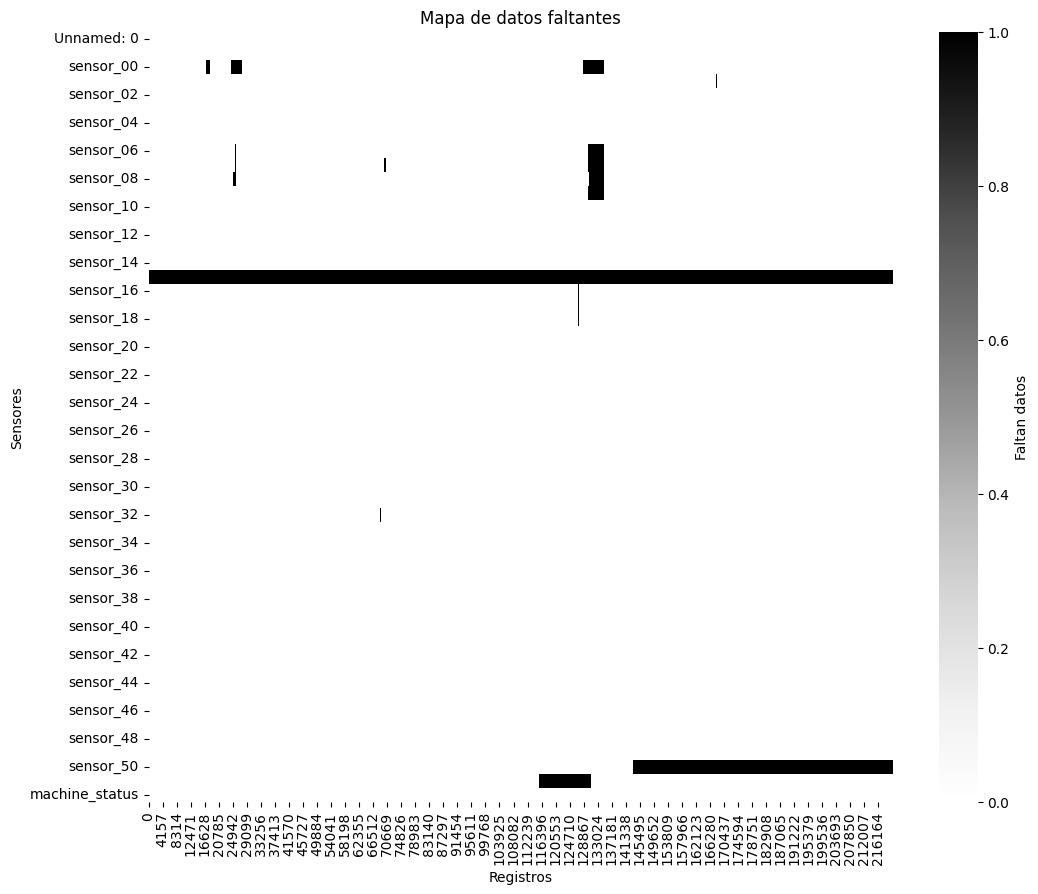

In [6]:

def plot_missing_values():
    '''
    Función que devuelve un gráfico de barras con los datos faltantes
    '''
    # plot a heatmap of the missing values
    plt.figure(figsize=(12,10))
    sns.heatmap(data.isna().transpose(),
                cmap='Greys',
                cbar_kws={'label': 'Faltan datos'})
    plt.title('Mapa de datos faltantes')
    plt.ylabel('Sensores')
    plt.xlabel('Registros')
    plt.show()
    
plot_missing_values()

La función plot_missing_values devuelve un gráfico de barras que muestra la cantidad de valores faltantes en cada columna del conjunto de datos.

Para crear el gráfico, primero se utiliza el método isna de pandas para seleccionar solo los valores faltantes del conjunto de datos. Luego, se utiliza el método transpose para transponer el conjunto de datos, de modo que las columnas se conviertan en filas y las filas en columnas.

A continuación, se utiliza la función heatmap de seaborn para crear un mapa de calor del conjunto de datos. El mapa de calor muestra una tabla de valores en forma de mapa de colores, donde los colores más oscuros indican valores más altos y los colores más claros indican valores más bajos. En este caso, el mapa de calor muestra la cantidad de valores faltantes en cada columna.

Por último, se utilizan las funciones title, ylabel y xlabel de matplotlib para establecer el título, el título del eje y y y el título del eje x, respectivamente, y se utiliza la función show para mostrar el gráfico.

Es importante tener en cuenta que esta función solo muestra el gráfico y no devuelve ningún valor. Para utilizar el gráfico, debes llamar a la función y luego procesar el gráfico de alguna manera, como guardarlo en un archivo o imprimirlo en la pantalla.

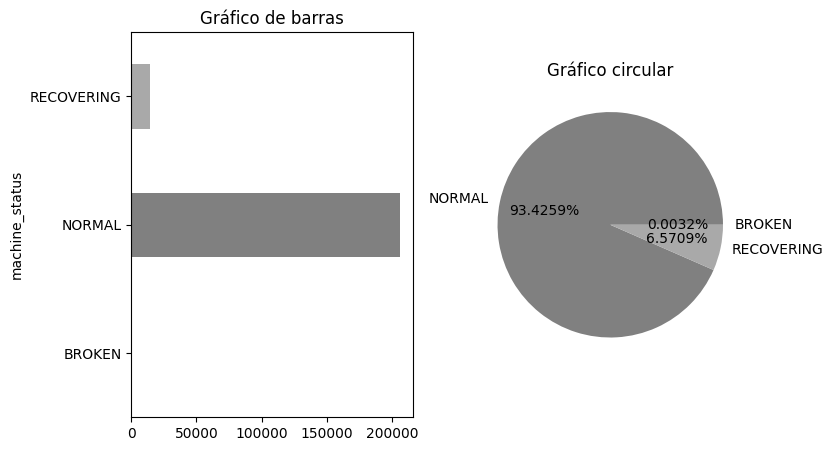

In [7]:
def pie_plot_machine_status():
    '''
    Función que devuelve un gráfico circular y un gráfico de barras con los datos de la columna machine_status
    '''
    data_clean = data_clean_df()
    # pie chart of machine status
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,5))
    data_clean.groupby('machine_status').size().plot(kind='barh', ax=ax1, color=['black', 'grey', 'darkgrey'])
    data_clean.groupby('machine_status').size().plot(kind='pie', ax=ax2, autopct='%.4f%%', colors=['black', 'grey', 'darkgrey'])
    ax1.set_title('Gráfico de barras')
    # xlabel 90 degrees
    ax1.set_xlabel('', rotation=90)
    ax2.set_title('Gráfico circular')
    ax2.set_ylabel('')
    plt.show()
    
pie_plot_machine_status()


In [8]:

    
def html_table_descripcion():
    data_descrp = data_clean.describe().T.reset_index()
    return data_descrp

html_table_descripcion()

,index,count,mean,std,min,25%,50%,75%,max
0,sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
1,sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
2,sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
3,sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
4,sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
5,sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
6,sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
7,sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960
8,sensor_09,215725.0,14.799210,2.091963,0.000000,15.053530,15.082470,15.118630,25.000000
9,sensor_10,220301.0,41.470339,12.093519,0.000000,40.705260,44.291340,47.463760,76.106860


La función html_table_descripcion devuelve una tabla con resúmenes estadísticos de cada columna del conjunto de datos.

Para crear la tabla, primero se utiliza el método describe de pandas para calcular resúmenes estadísticos para cada columna del conjunto de datos. Los resúmenes incluyen estadísticas como la media, la mediana, el mínimo, el máximo y los cuartiles. Luego, se utiliza el método T para transponer la tabla, de modo que las columnas se conviertan en filas y las filas en columnas. Finalmente, se utiliza el método reset_index para restablecer el índice de la tabla y convertirlo en una columna normal.

Es importante tener en cuenta que esta función solo devuelve la tabla y no la muestra en pantalla. Para utilizar la tabla, debes procesarla de alguna manera, como guardarla en un archivo o mostrarla en una página web.

In [9]:

# - mapping normal, recovering and broken to 2, 1, 0
m = {'NORMAL': 2, 'RECOVERING': 1, 'BROKEN': 0}  # mapping
data_clean['stat'] = data_clean['machine_status'].map(m)  # mapping
data_clean['rol'] = data_clean['stat'].rolling(2).mean()  # rolling mean


Primero, se define un diccionario m que asigna valores numéricos a los distintos estados de la máquina: 'NORMAL' se asigna el valor 2, 'RECOVERING' se asigna el valor 1 y 'BROKEN' se asigna el valor 0.

Luego, se utiliza el método map de pandas para reemplazar los valores de la columna 'machine_status' con los valores numéricos del diccionario m. El resultado se asigna a la nueva columna 'stat'.

A continuación, se utiliza el método rolling de pandas para calcular el promedio móvil de la columna 'stat'. El promedio móvil es el promedio de una ventana de datos móviles a lo largo del tiempo. En este caso, se utiliza una ventana de dos elementos, lo que significa que se calcula el promedio de cada par de elementos consecutivos. El resultado se asigna a la nueva columna 'rol'.

In [10]:
# count number of rows in stat column that are 0, 1, 2
num_0 = data_clean[data_clean['stat'] == 0].shape[0]
num_1 = data_clean[data_clean['stat'] == 1].shape[0]
num_2 = data_clean[data_clean['stat'] == 2].shape[0]
print(num_0, num_1, num_2)

7 14477 205836


In [11]:

# Seleccionamos las columnas de los sensores
sensor_cols = data_clean.iloc[:,1:52]
# drop machine_status column in sensor_cols
sensor_cols = sensor_cols.drop('machine_status', axis=1)

# clasificamos los sensores en 3 grupos:
broken_rows = data_clean[data_clean['machine_status']=='BROKEN']
recovery_rows = data_clean[data_clean['machine_status']=='RECOVERING']
normal_rows = data_clean[data_clean['machine_status']=='NORMAL']
machine_status_col = data_clean['machine_status']


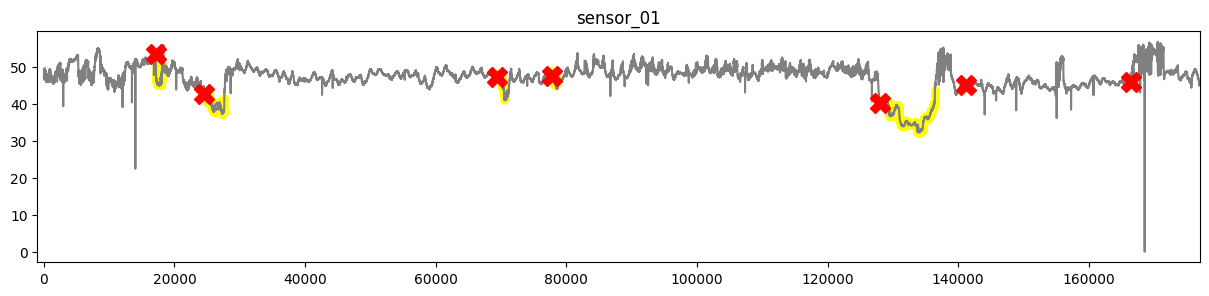

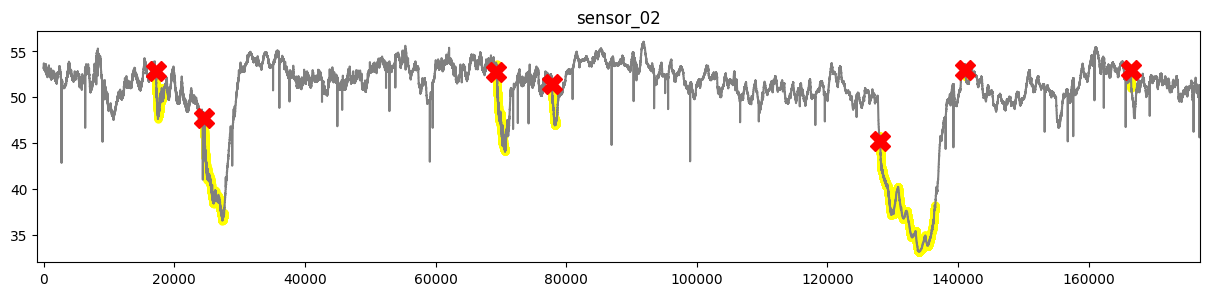

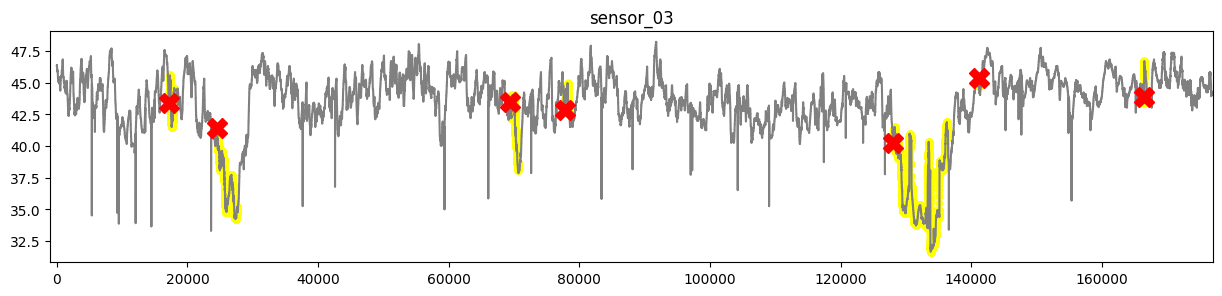

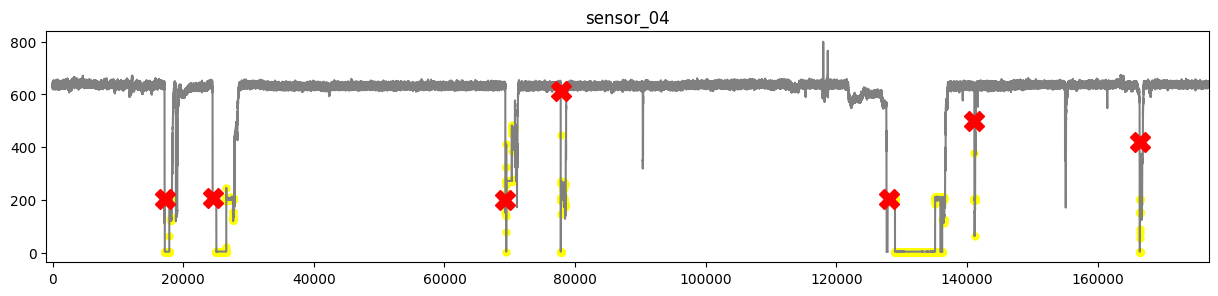

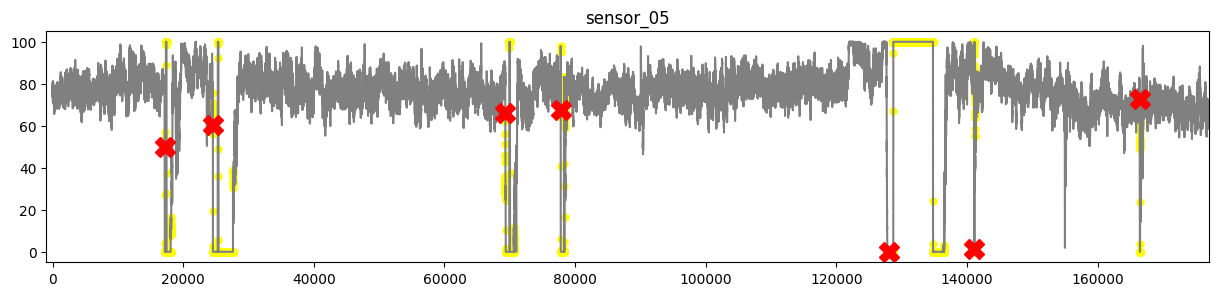

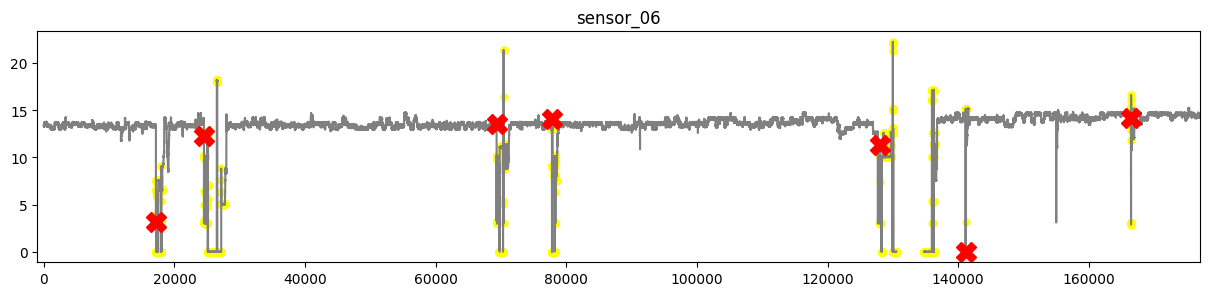

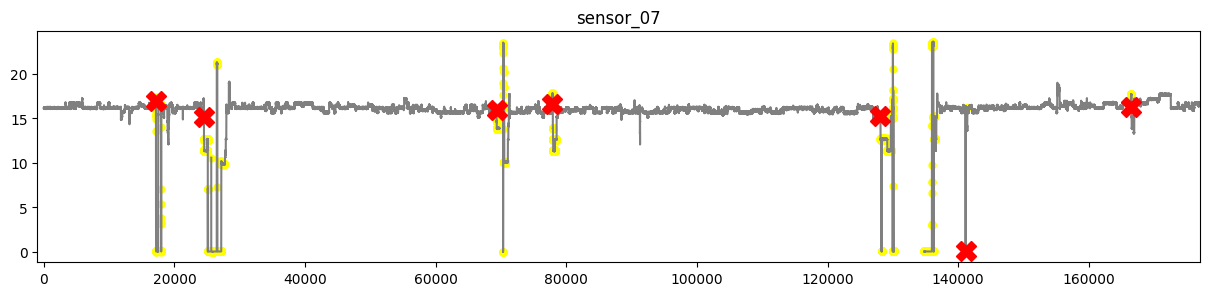

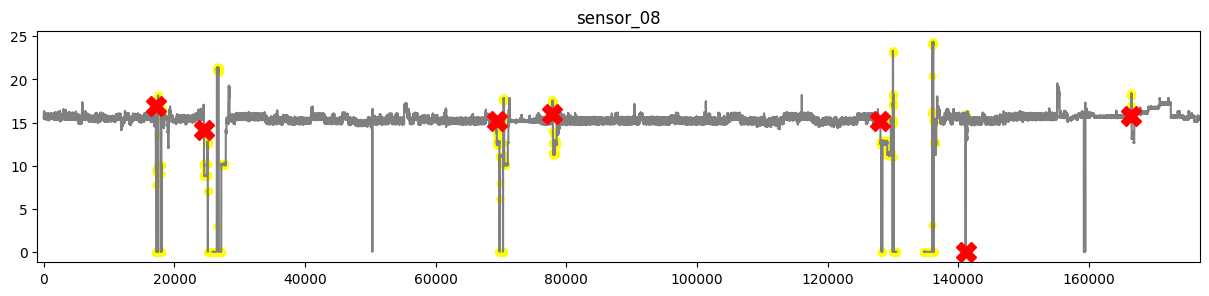

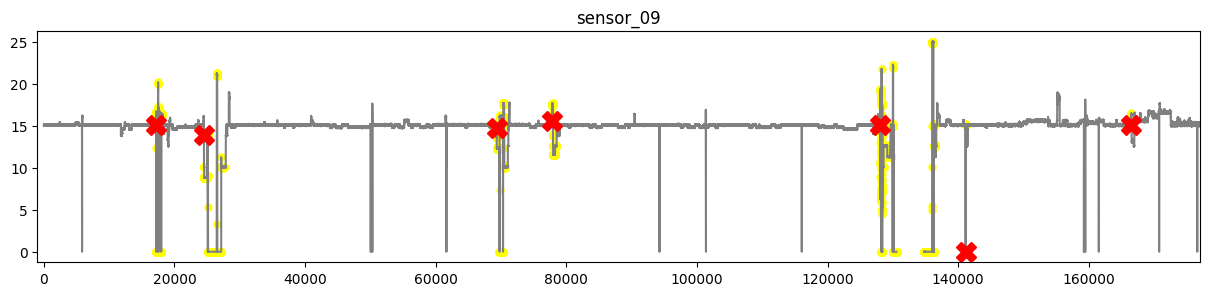

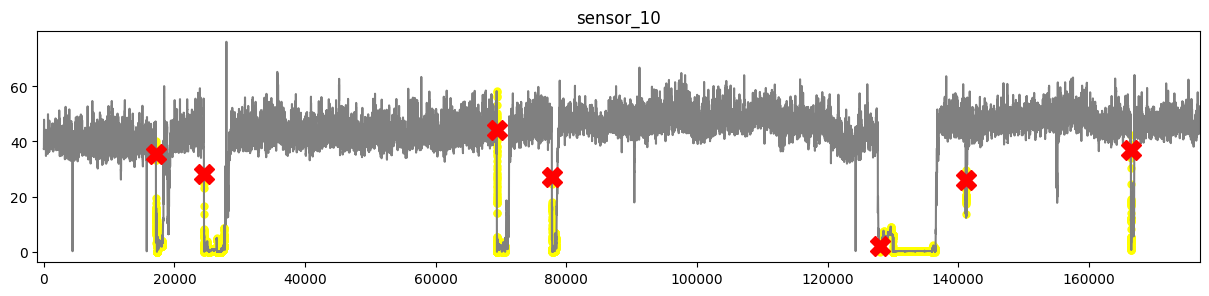

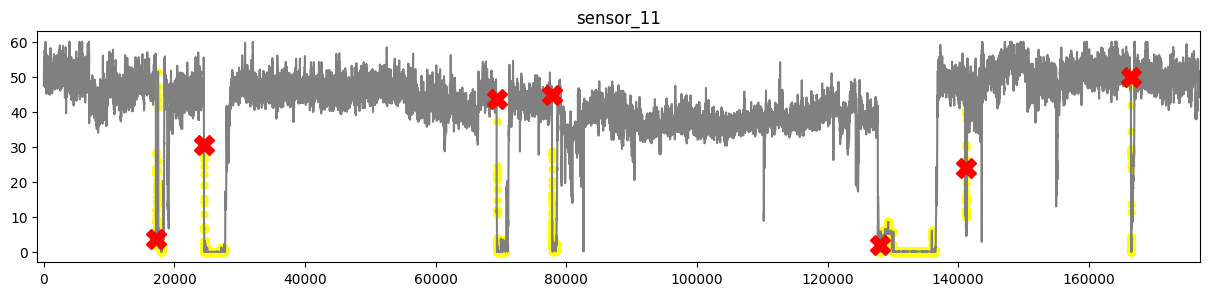

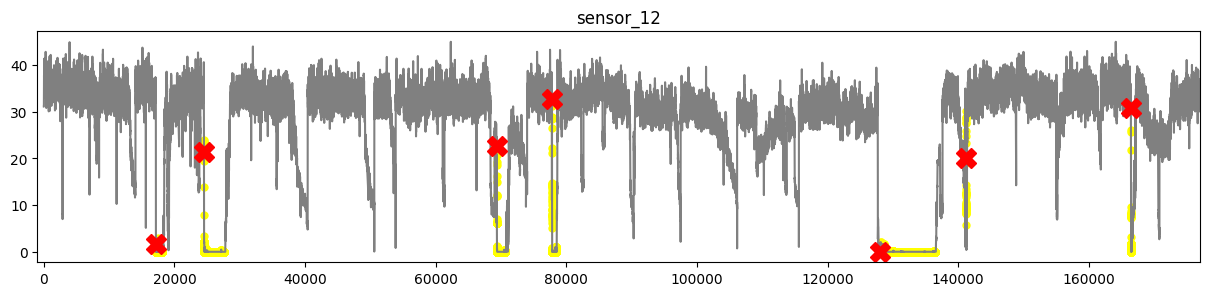

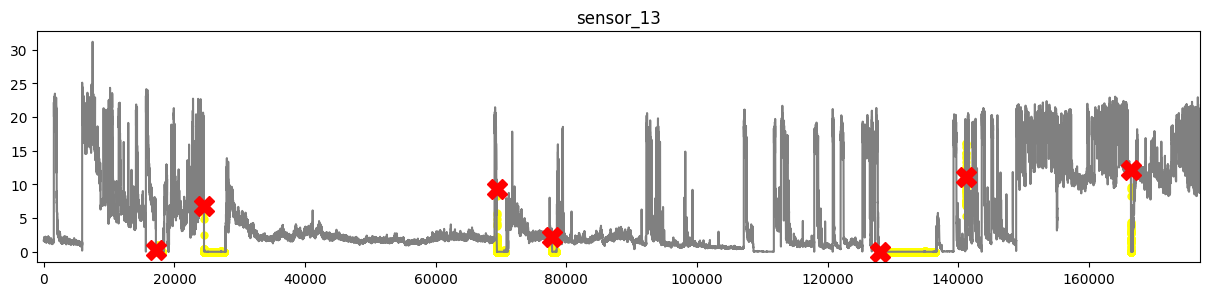

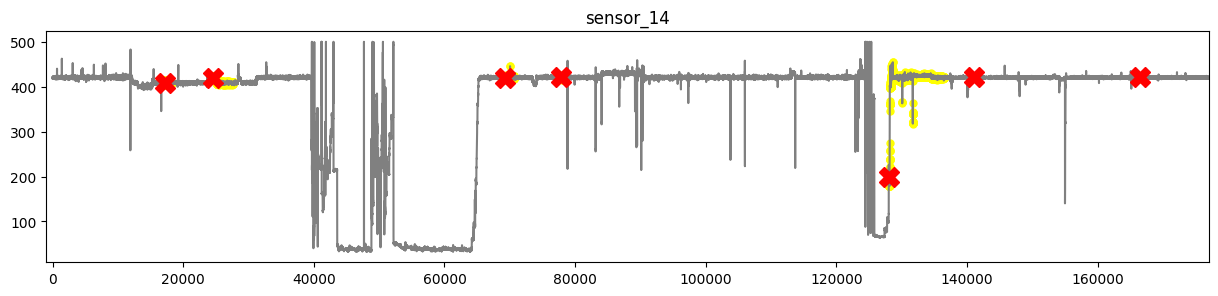

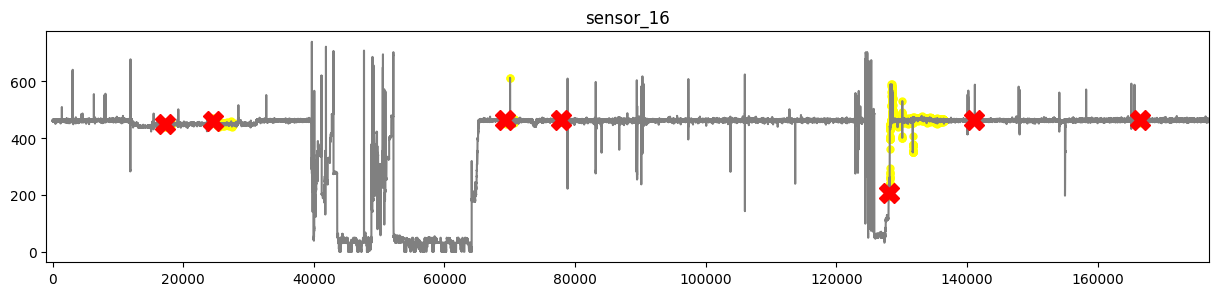

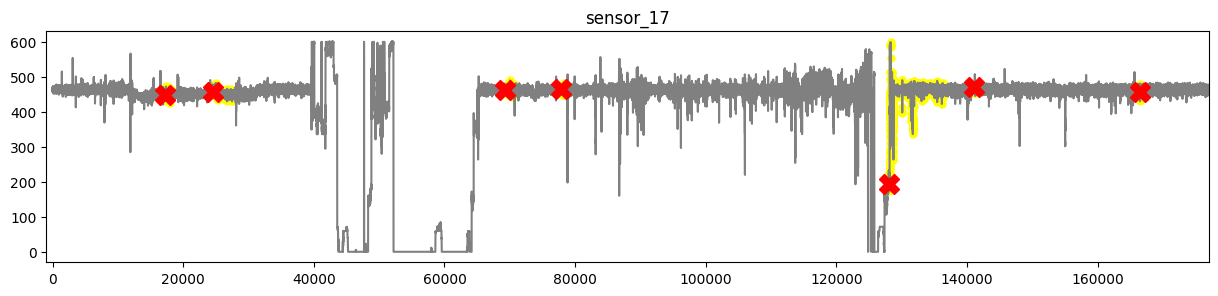

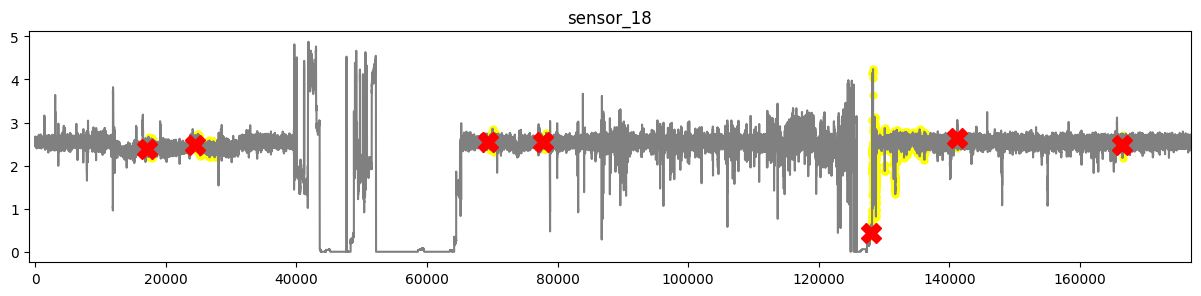

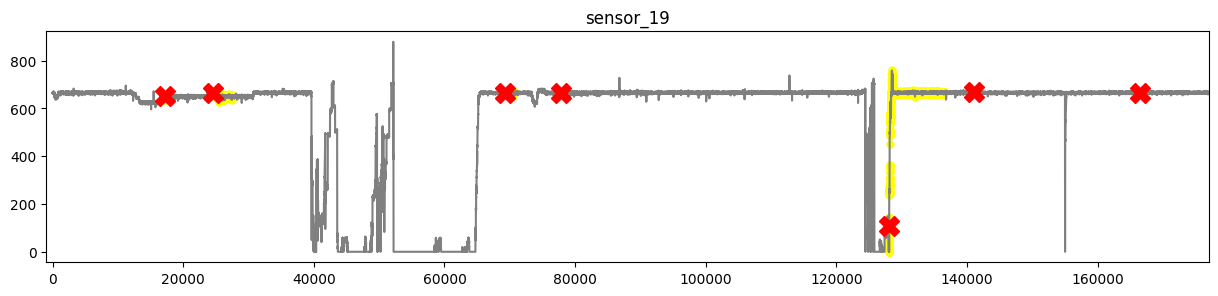

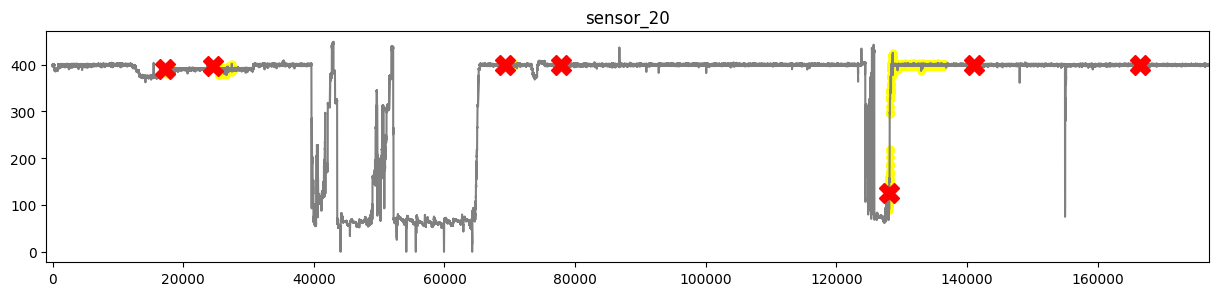

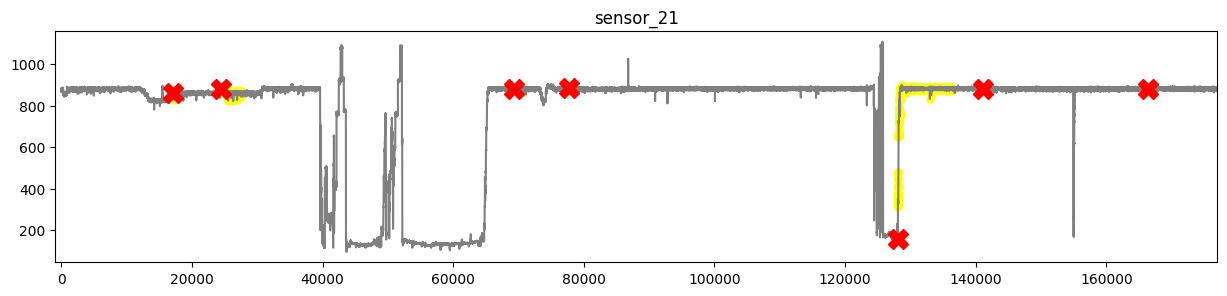

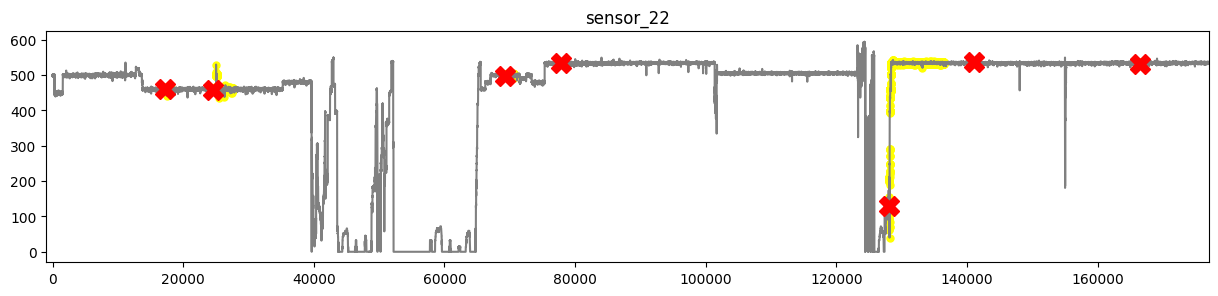

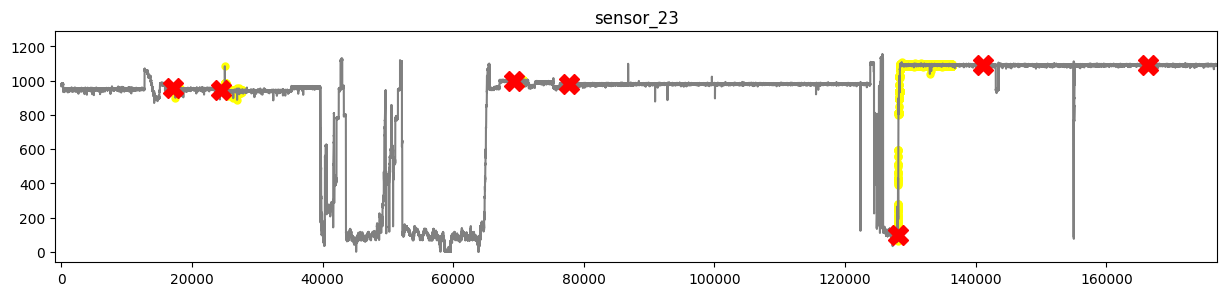

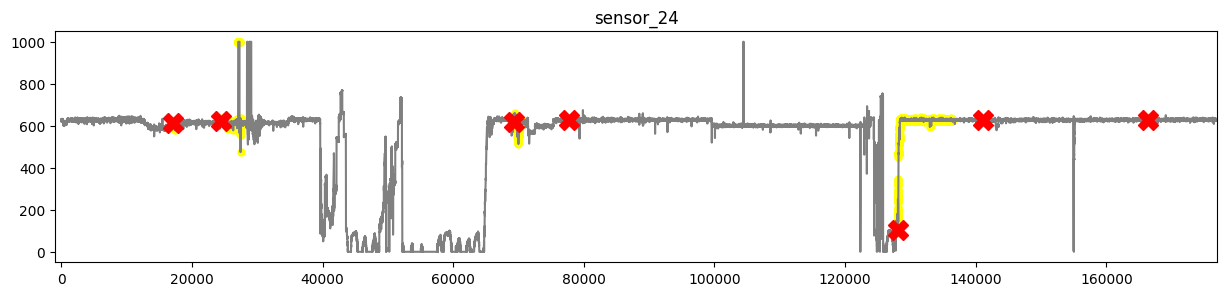

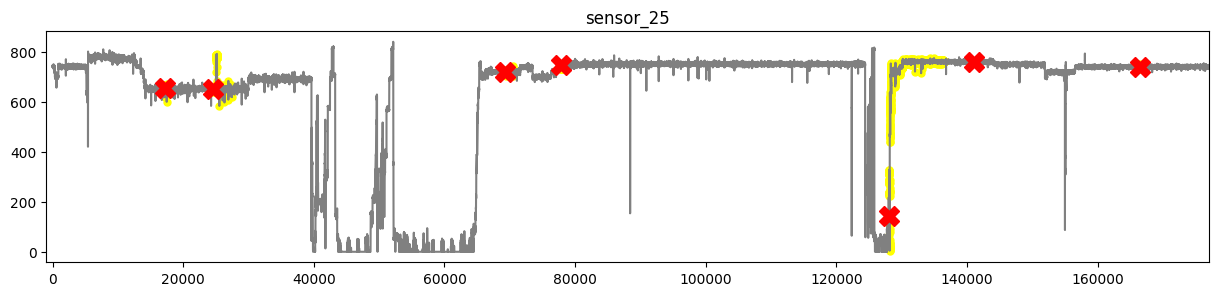

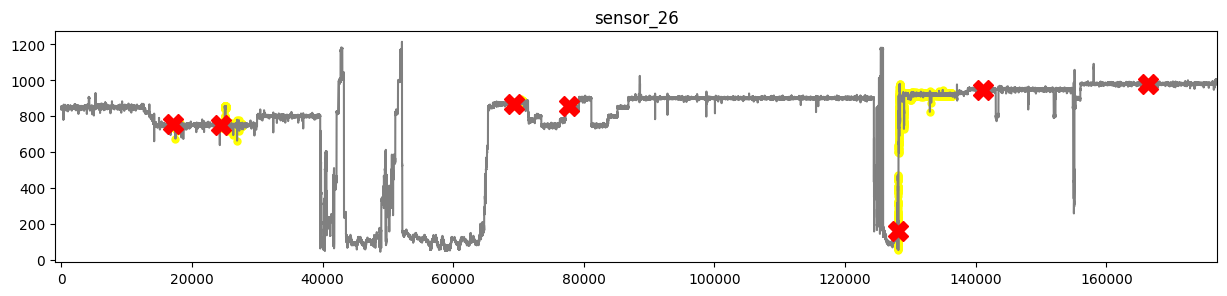

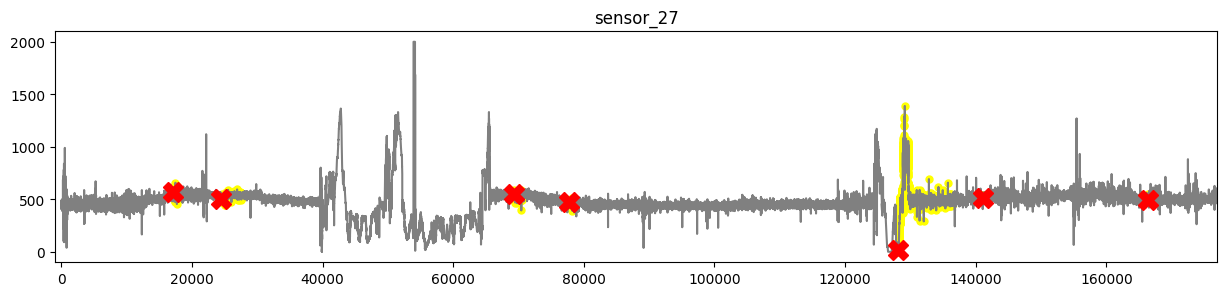

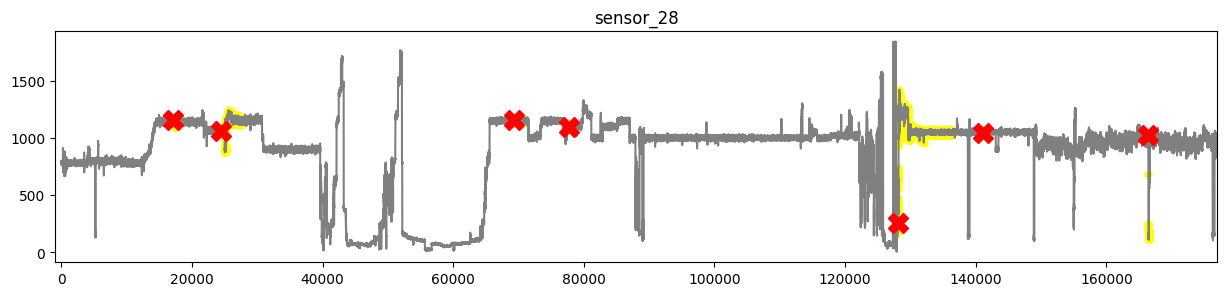

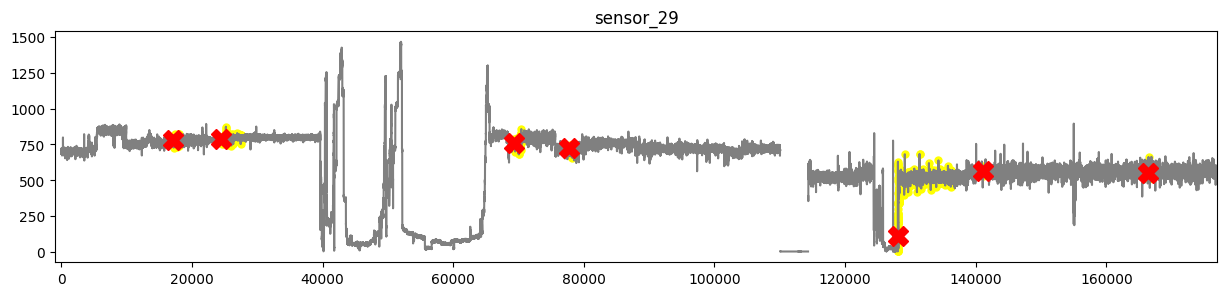

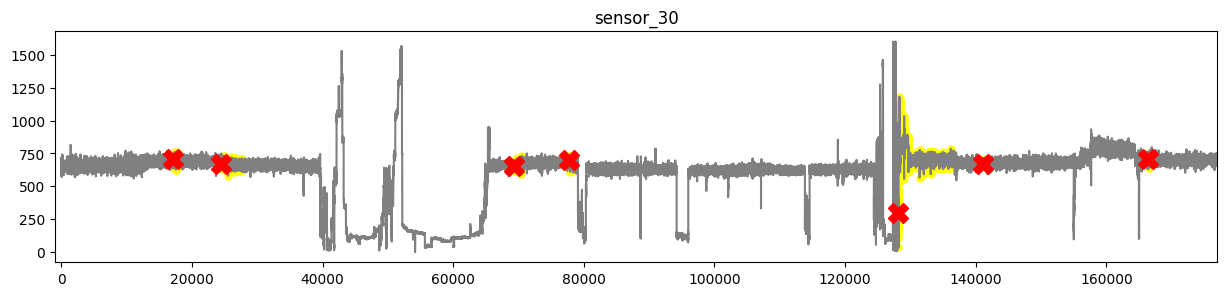

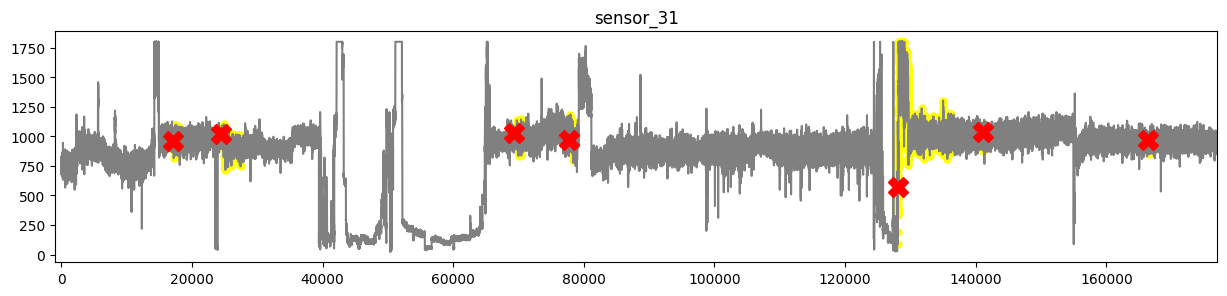

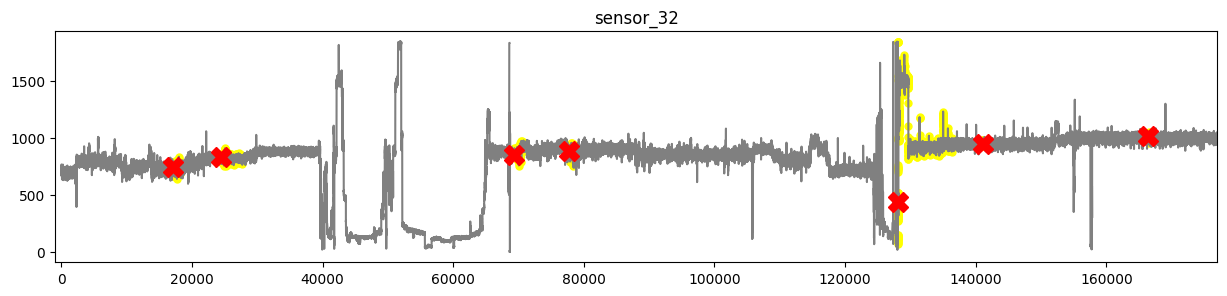

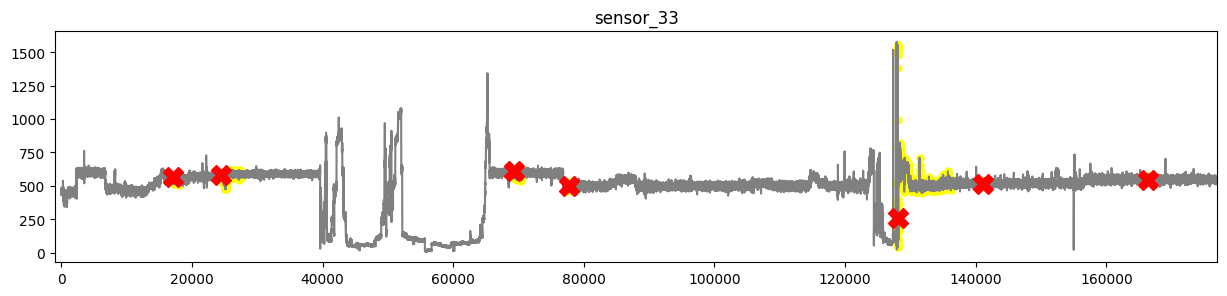

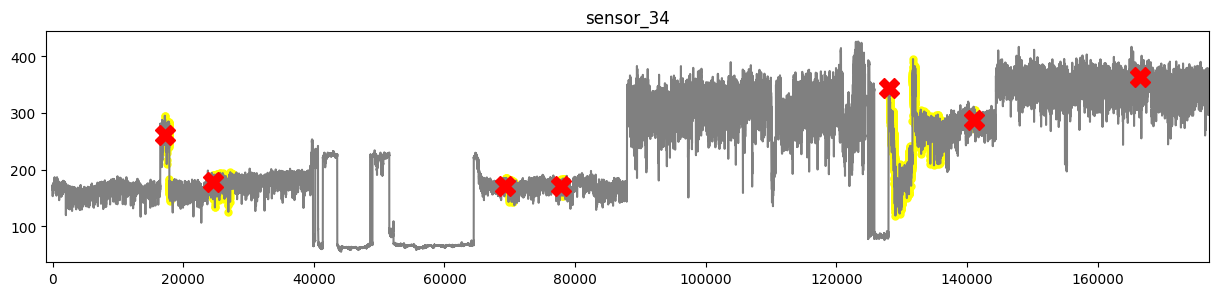

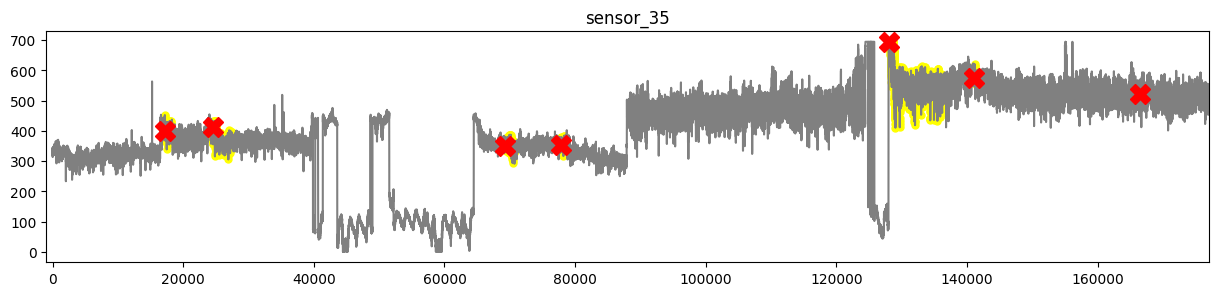

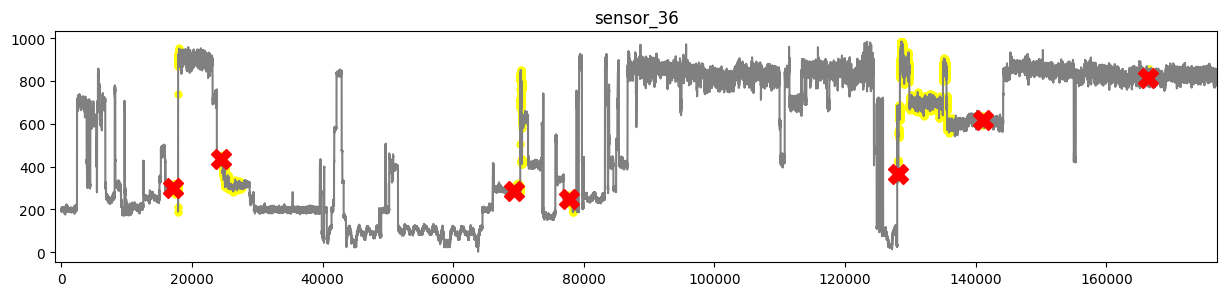

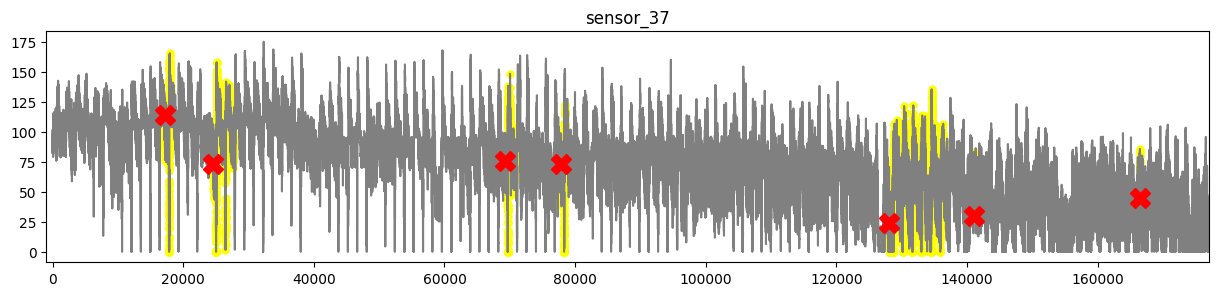

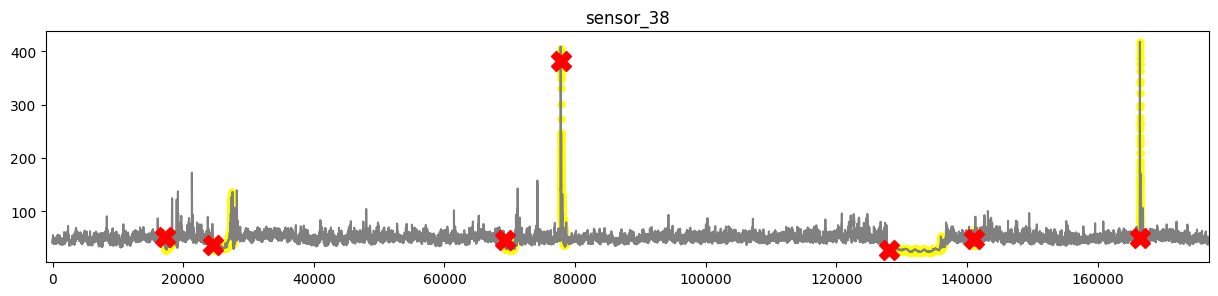

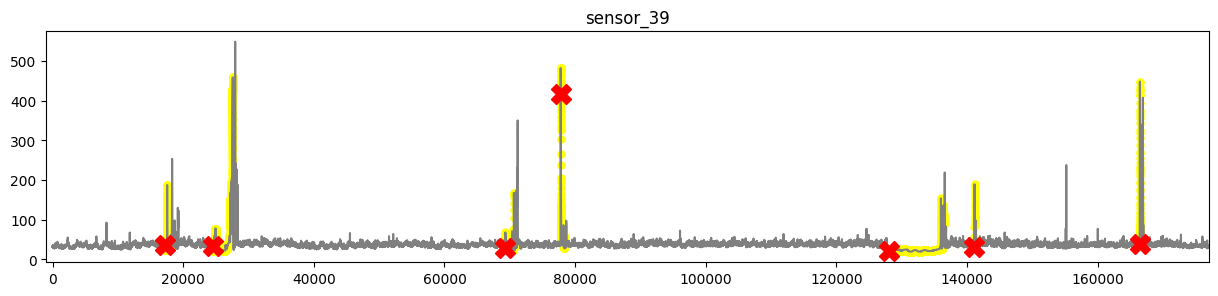

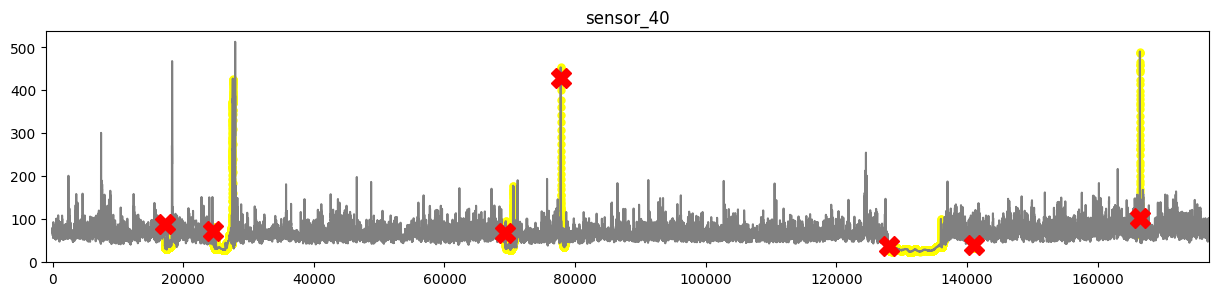

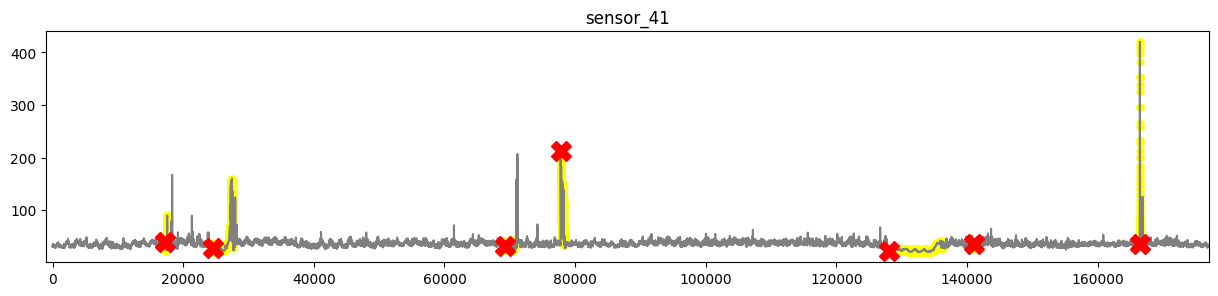

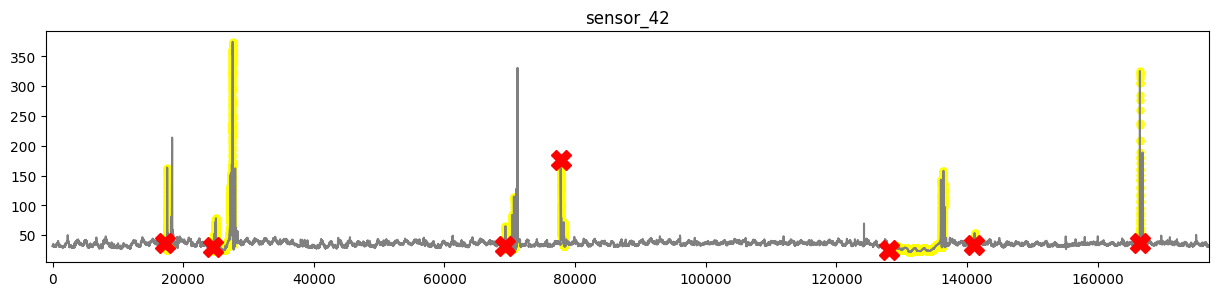

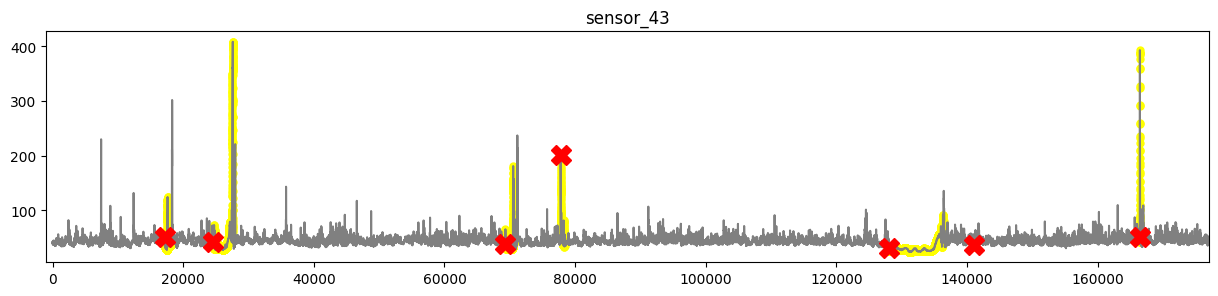

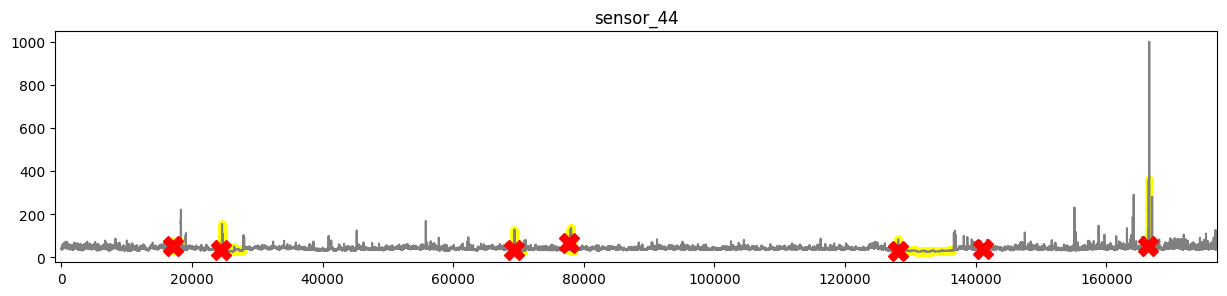

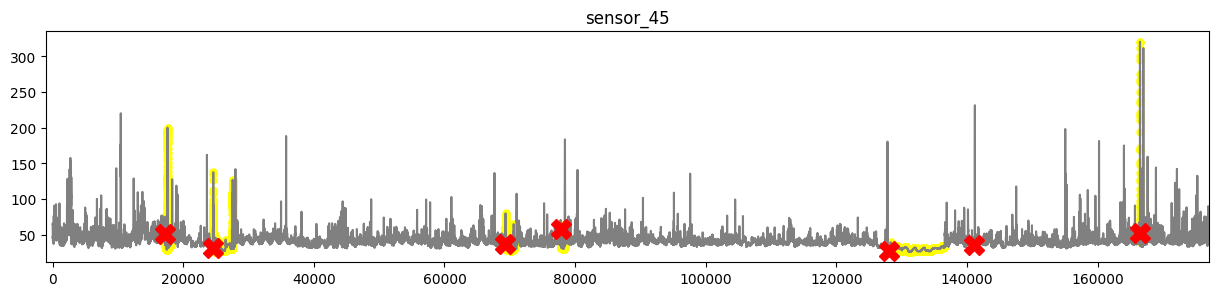

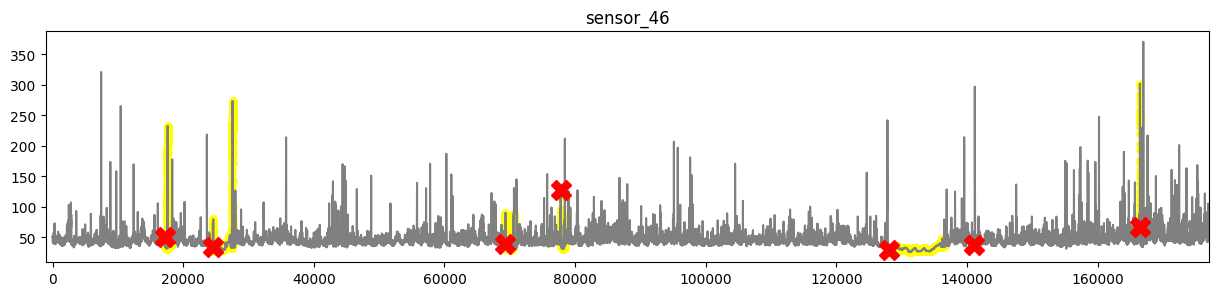

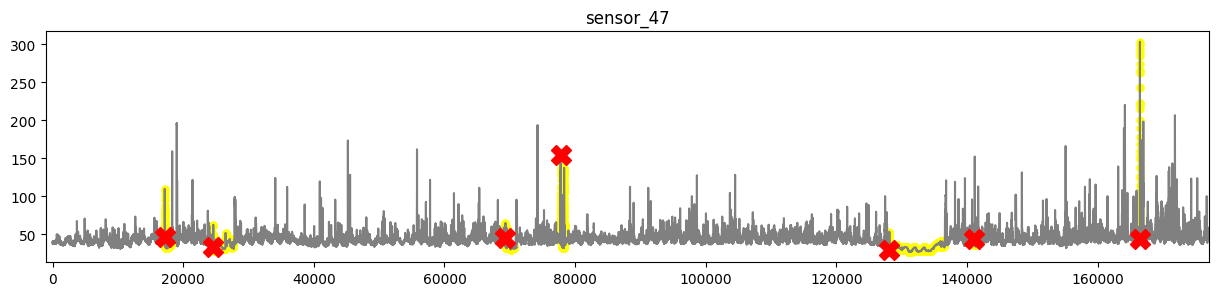

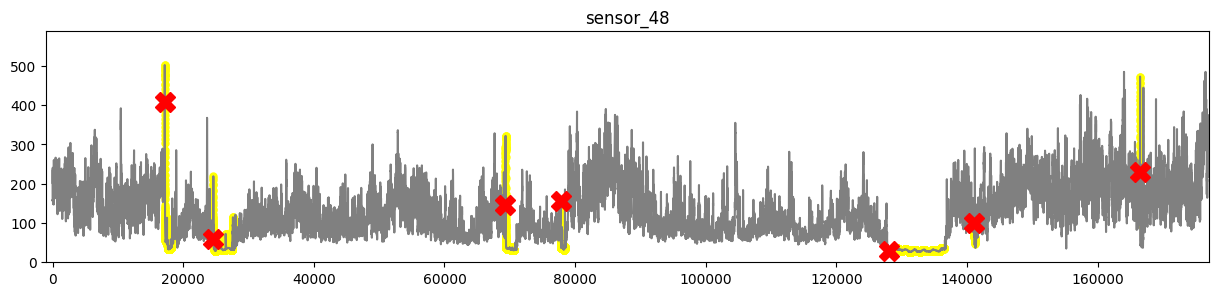

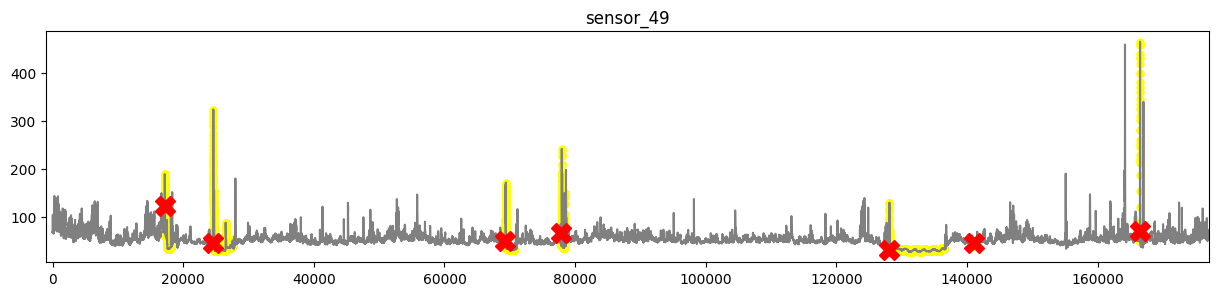

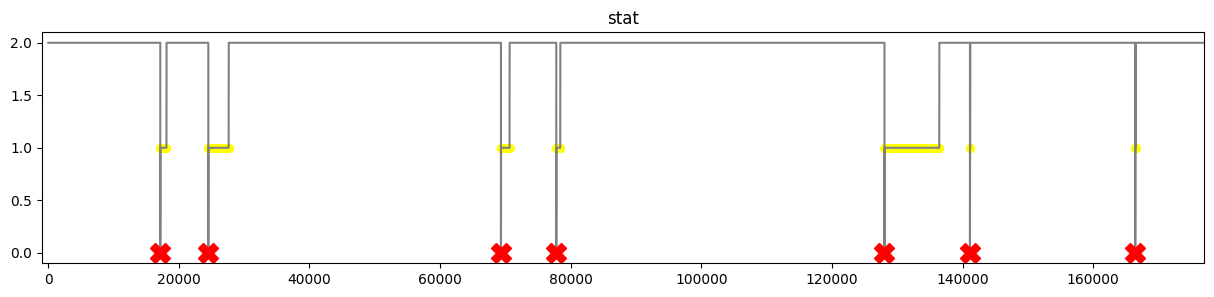

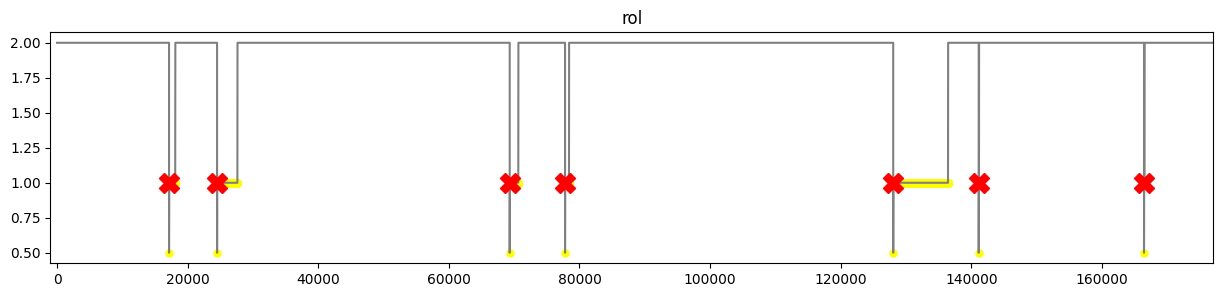

In [12]:


# This visualization loop was inspired from JANANI KARIYAWASAM found at 
# https://www.kaggle.com/code/jananikariyawasam/data-cleaning-and-feature-engineering

def plot_sensors():
    for sensor in sensor_cols:
        plot = plt.figure(figsize=(15,3))
        plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5)
        plot = plt.plot(data_clean[sensor], color='grey')
        plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=14)
        plot = plt.title(sensor)
        plt.xlim((-1000,177000))
        # plt.savefig('static/graficas/'+sensor+'.png')
        plt.show()
        plt.close()
        
plot_sensors()


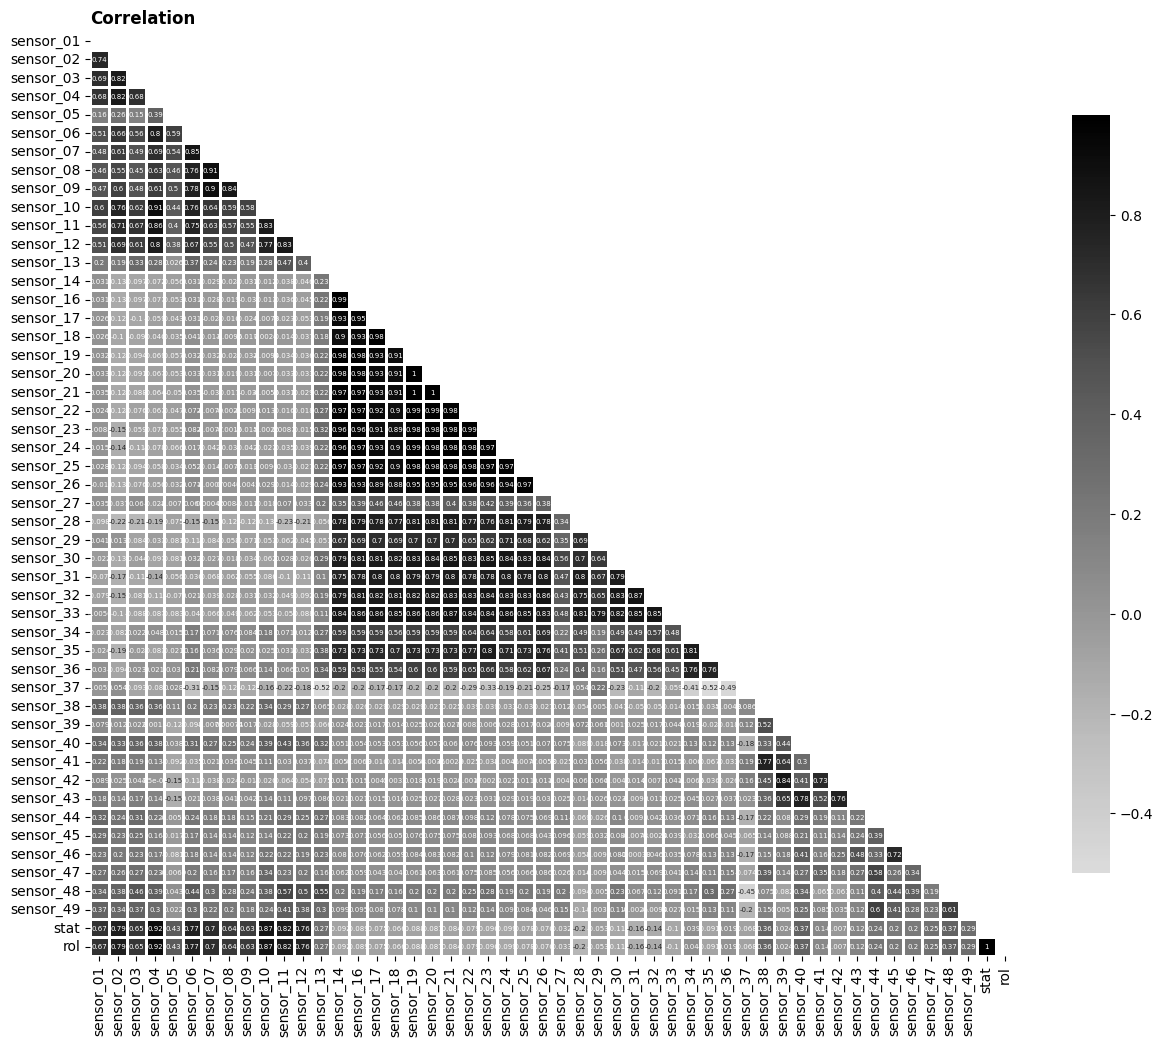

In [13]:
        
data_clean_corr = data_clean.corr(numeric_only=True) # correlation matrix for numeric columns

def corr_heat_map():
    # Heatmap for the entire data

    fig, ax = plt.subplots(1, 1, figsize=(15, 12))
    

    mask = np.zeros_like(data_clean_corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(data_clean_corr, ax=ax,
            square=True, center=0, linewidth=1,
            cmap='Greys',
            cbar_kws={'shrink': .82},
            mask=mask,
            annot=True,
            annot_kws={'size':5}
            )
    ax.set_title(f'Correlation', loc='left', fontweight='bold')
    # plt.savefig('static/graficas/corr_heatmap.png')
    plt.show()
    plt.close()   
    
corr_heat_map()

La función corr_heat_map devuelve un gráfico de mapa de calor que muestra la correlación entre las columnas numéricas del conjunto de datos.

La correlación es una medida de la relación lineal entre dos variables. Una correlación alta indica que las variables están estrechamente relacionadas y una correlación baja indica que las variables no están relacionadas.

Para calcular la correlación, se utiliza el método corr de pandas, que calcula la correlación entre todas las parejas de columnas del conjunto de datos. El resultado se asigna a la variable data_clean_corr.

A continuación, se utiliza la función heatmap de seaborn para crear un mapa de calor de la matriz de correlación. El mapa de calor muestra una tabla de valores en forma de mapa de colores, donde los colores más oscuros indican valores más altos y los colores más claros indican valores más bajos. En este caso, el mapa de calor muestra la correlación entre las columnas numéricas del conjunto de datos.

Por último, se utiliza la función title de matplotlib para establecer el título del gráfico y se utiliza la función `

In [14]:
     

# Correlation between the sensors and the machine status
l = [] # empty list to store the columns with correlation > 0.75
for i in data_clean_corr['stat'].index:
    if data_clean_corr['stat'][i] > 0.75:
        print(i)
        l.append(i)
  
      
# drop last 2 columns
l.pop()
#l.pop()
    

# add 'timestamp', 'machine_status' to the list
l = ['timestamp', 'machine_status'] + l

print(l)

sensor_02
sensor_04
sensor_06
sensor_10
sensor_11
sensor_12
stat
rol
['timestamp', 'machine_status', 'sensor_02', 'sensor_04', 'sensor_06', 'sensor_10', 'sensor_11', 'sensor_12', 'stat']


In [15]:


# Split into training data and test data
X = data_clean[['sensor_02', 'sensor_04', 'sensor_06', 'sensor_10', 'sensor_11', 'sensor_12']]

y = data_clean['stat']


In [16]:
y

0         2
1         2
2         2
3         2
4         2
         ..
220315    2
220316    2
220317    2
220318    2
220319    2
Name: stat, Length: 220320, dtype: int64

In [17]:
# estandarizamos las variables 
X_norm = (X - X.mean()) / X.std()

In [18]:
#fill NA's with forward fill propogation
X_norm = X_norm.fillna(method='ffill')
y = y.fillna(method='ffill')

In [19]:

validation_size = 0.20 # Establecemos el tamaño de la muestra de validación
seed = 7 
#random_state, se usa para inicializar el generador interno 
#de números aleatorios, que decidirá la división de datos en índices
#de prueba y de test en su caso.
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_norm, y, test_size=validation_size, random_state=seed)
print (X_train.shape)
print (X_validation.shape)
print (Y_train.shape)
print (Y_validation.shape)

(176256, 6)
(44064, 6)
(176256,)
(44064,)


In [20]:
# Logistic Regression (LR)
# Linear Discriminant Analysis (LDA)
# K-Nearest Neighbors (KNN).
# Classification and Regression Trees (CART).
# Gaussian Naive Bayes (NB).
# Support Vector Machines (SVM).
# K-Means Clustering (KMC).
# RandomForestClassifier (RFC).

# Métricas de evaluación
seed = 7 # Establecemos la semilla
scoring = 'accuracy' # Establecemos la métrica de evaluación

# Algoritmos
models = [] #2 columnas de información: Nombre y modelo
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('KMC', KMeans()))
models.append(('RFC', RandomForestClassifier()))
print (models)

[('LR', LogisticRegression()), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('SVM', SVC()), ('KMC', KMeans()), ('RFC', RandomForestClassifier())]


In [21]:
# Entrenar y evaluar modelos
results = [] # Generamos una lista vacía para guardar los resultados
names = [] # Generamos una lista vacía con los nombres de los modelos
#name=Nombre y model=Modelo
for name, model in models: # Recorremos los modelos
#Proporciona índices de prueba/test para dividir datos en conjuntos
#Divide el conjunto de datos en k pliegues consecutivos 
#Cada pliegue se usa una vez como validación, mientras que los
#k - 1 pliegues restantes forman el conjunto de entrenamiento.
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True) # Establecemos el número de pliegues
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) # Entrenamos el modelo
	results.append(cv_results)  # Guardamos los resultados
	names.append(name) # Guardamos los nombres de los modelos
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # Mostramos los resultados
	print(msg) # Mostramos los resultados
	print("La media de los resultados es: {} y la desviación estándar es: {}".format(cv_results.mean(), cv_results.std())) # Mostramos los resultados

/home/oscar/Documentos/TFM/dashboard/TFM_project/my_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/oscar/Documentos/TFM/dashboard/TFM_project/my_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

LR: 0.994117 (0.000545)
La media de los resultados es: 0.9941165216117712 y la desviación estándar es: 0.0005447067033496082
LDA: 0.987059 (0.000673)
La media de los resultados es: 0.9870585989588235 y la desviación estándar es: 0.000672909331079805
KNN: 0.999677 (0.000144)
La media de los resultados es: 0.9996766073329775 y la desviación estándar es: 0.00014363935391012618
CART: 0.999518 (0.000132)
La media de los resultados es: 0.9995177488445905 y la desviación estándar es: 0.00013244275612744614
NB: 0.982508 (0.001177)
La media de los resultados es: 0.9825084033660783 y la desviación estándar es: 0.0011767107835311446
SVM: 0.998162 (0.000331)
La media de los resultados es: 0.9981617648976006 y la desviación estándar es: 0.0003310197121410058


/home/oscar/Documentos/TFM/dashboard/TFM_project/my_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/oscar/Documentos/TFM/dashboard/TFM_project/my_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/oscar/Documentos/TFM/dashboard/TFM_project/my_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/oscar/Documentos/TFM/dashboard/TFM_project/my_venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` 

KMC: 0.096280 (0.069324)
La media de los resultados es: 0.0962801956812671 y la desviación estándar es: 0.06932392232876225
RFC: 0.999745 (0.000171)
La media de los resultados es: 0.9997446901860807 y la desviación estándar es: 0.00017067502675756257


In [21]:
# KNN en el set de validación/test
knn = KNeighborsClassifier() # Establecemos el modelo
#Un método de ajuste (X, Y) para ajustar el modelo 
knn.fit(X_train, Y_train) # Entrenamos el modelo
#Un método de predicción (X) que, dadas las observaciones sin 
# etiquetar X, devuelve las etiquetas predichas Y.
predictions = knn.predict(X_validation) # Predecimos
accuracy_score(Y_validation, predictions) # Calculamos la precisión
print("La precisión del modelo KNN es: ", accuracy_score (Y_validation, predictions))
acc = accuracy_score (Y_validation, predictions)
precision, recall, fscore, support = precision_recall_fscore_support(Y_validation, predictions,
                                                                     zero_division=1, 
                                                                     average = 'micro')
print('KNN Test Results')
print('Test Accuracy:', round(acc, 4))
print('Test Precision:', round(precision, 4))
print('Test Recall:', round(recall, 4))

La precisión del modelo KNN es:  0.9997957516339869
KNN Test Results
Test Accuracy: 0.9998
Test Precision: 0.9998
Test Recall: 0.9998


In [22]:
# Mostramos la matriz de confusión
confusion_matrix(Y_validation, predictions)

array([[    0,     0,     1],
       [    0,  2878,     4],
       [    0,     4, 41177]])

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for j in range(cm.shape[0]):
        for i in range(cm.shape[1]):
                    plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valores reales')
    plt.xlabel('Valores predicción')

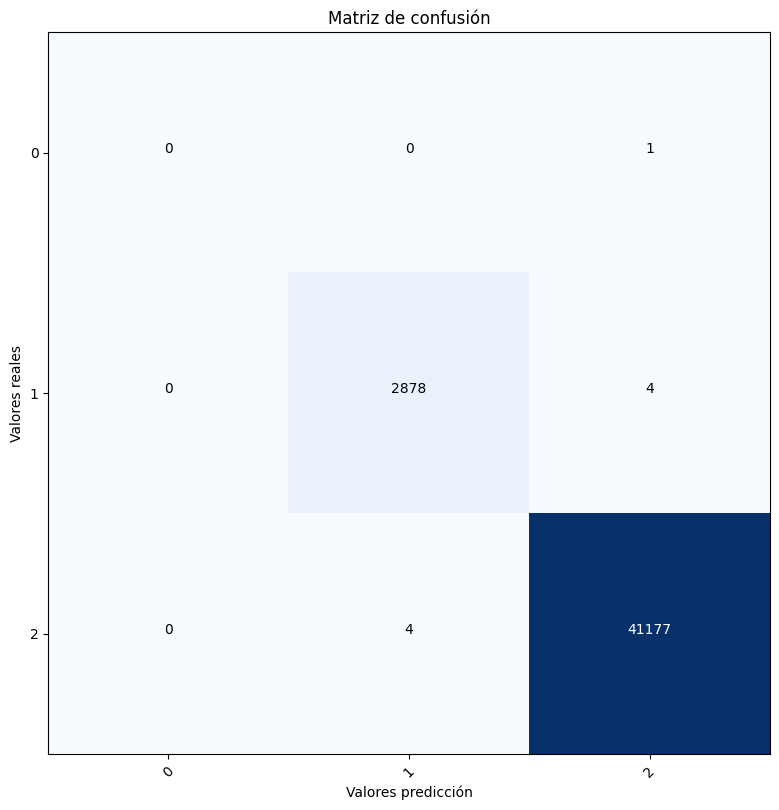

In [24]:
# Plot a confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(confusion_matrix(Y_validation, predictions), classes=['0', '1', '2'], normalize=False, title='Matriz de confusión')
plt.show()

We have preprocessed our data again to ensure a clean slate in the new model. Now we'll use GridSearchCV with KNN to find the best parameters to use with this model.

X_train, X_validation, Y_train, Y_validation

In [25]:
# find best KNN using gridsearch
parameters = {'n_neighbors': [3, 5, 10], 
             'weights': ['uniform', 'distance'], 
             'algorithm': ['ball_tree', 'kd_tree'], 
             'p': [1, 2]}
grid_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = parameters, 
                        cv = 3) 
grid_KNN.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [26]:
# what are the best parameters we found?
best_param = grid_KNN.best_params_
print("Best parameters:", best_param)

Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [27]:
# KNN train best model
KNN_model = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'],
                          algorithm = best_param['algorithm'],
                          p = best_param['p'], 
                          weights = best_param['weights'])
KNN_model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='ball_tree', p=1, weights='distance')

In [32]:
# test the testing set with KNN
ypred = KNN_model.predict(X_validation)

In [30]:
# pickle the model
pd.to_pickle(KNN_model, '../media/KNN_model.pickle')
print("ML-unpickle model")
# unpickle the model
KNN_model = pd.read_pickle('../media/KNN_model.pickle')

ML-unpickle model


We now have a workable KNN model and its predictions. Let's visualize it! We will use just one sensor (sensor_04) to visualize the outcome since all the normal, recovering and broken occurances are at the same point in time for all sensors. 

In [33]:
#Cell hidden for easier readability

# Visualize the clusters. 
# First combine the test and training into one
KNN_data = pd.DataFrame(np.concatenate((X_train, X_validation)))
KNN_data.columns =  ['sensor_02', 'sensor_04', 'sensor_06', 'sensor_10', 'sensor_11', 'sensor_12']
columnas = KNN_data.columns
KNN_data['cluster'] = np.concatenate((Y_train, ypred))
KNN_data['time'] = pd.to_datetime(data['timestamp'])
unique_elements, counts_elements = np.unique(ypred, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))
KNN_data['cluster']

#{'NORMAL': 2, 'RECOVERING': 1, 'BROKEN': 0}
KNN_data['cluster_num'] = KNN_data['cluster']
#KNN_data['cluster_num'] = KNN_data['cluster'].map({'BROKEN': 0, 'NORMAL':2, 'RECOVERING':1})

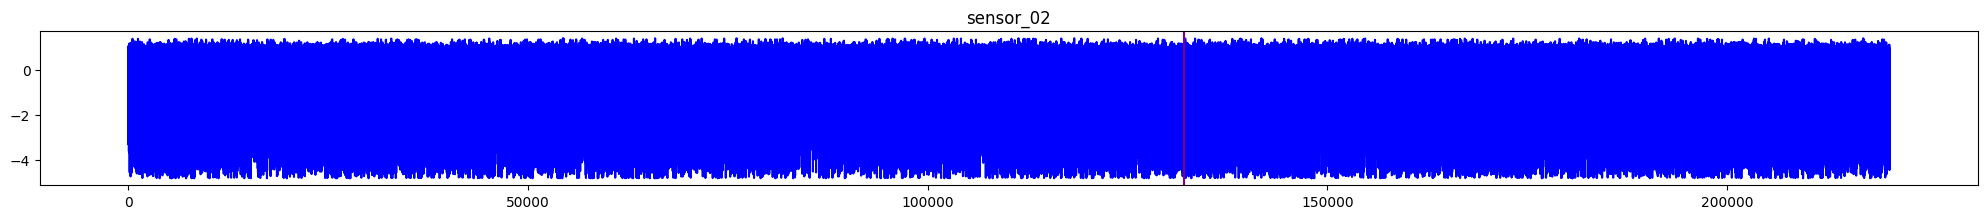

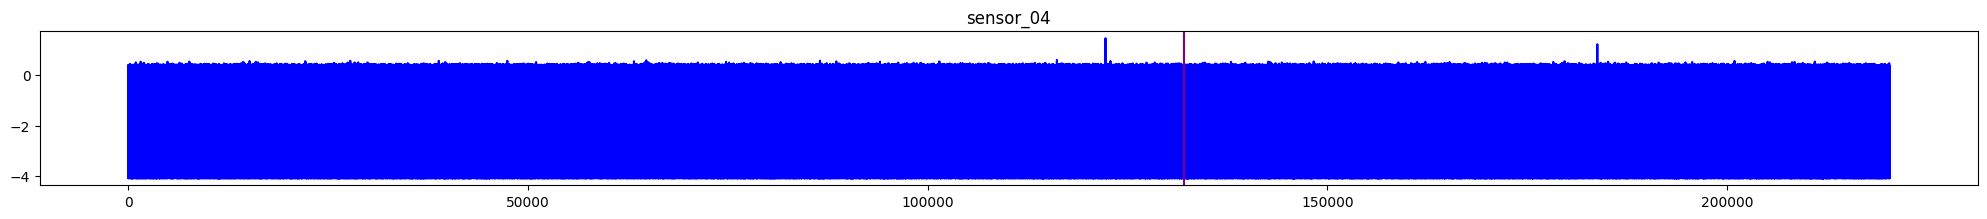

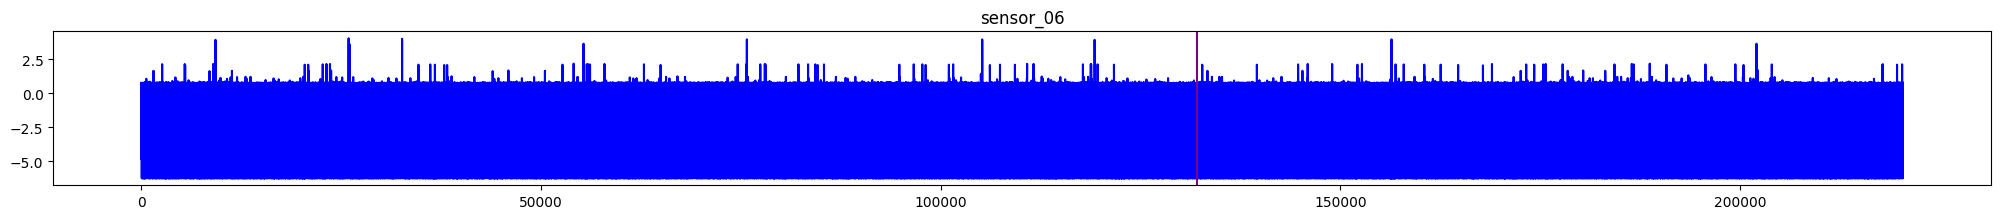

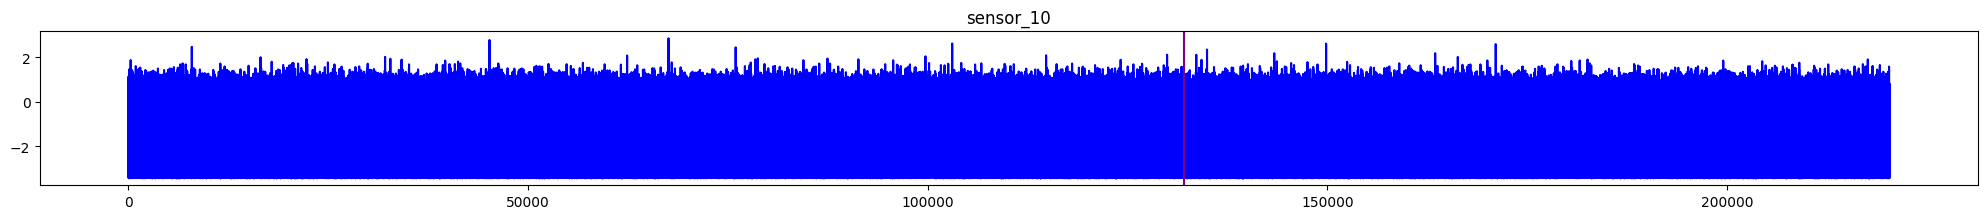

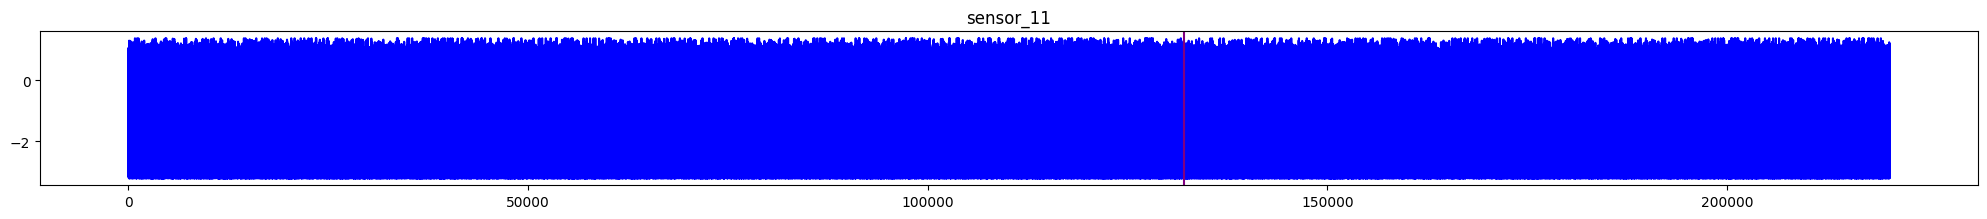

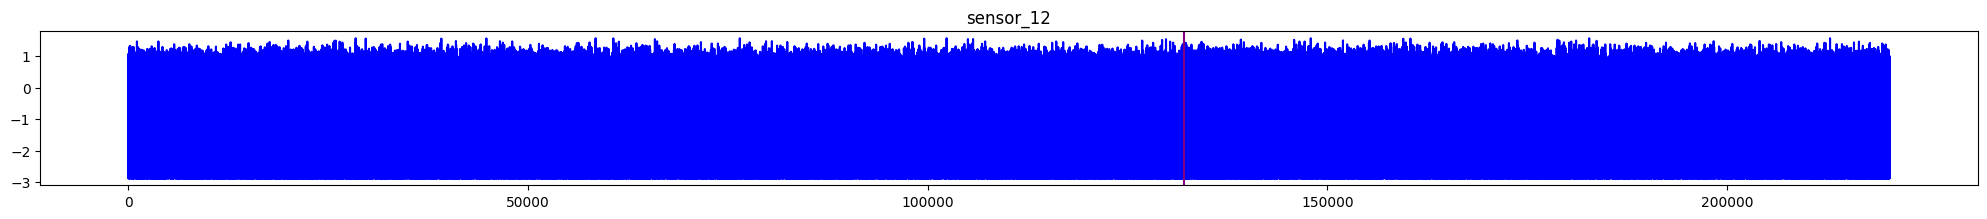

In [34]:
colors = ['red', 'limegreen', 'yellow']
colors_plot = [colors[i] for i in (KNN_data['cluster_num'].values)]
sensors_to_plot = ['sensor_04']  #sensor 04 explains the most variance from the PCA model

#continue coloring 
broken_rows = KNN_data[KNN_data['cluster']=='BROKEN']
recovery_rows = KNN_data[KNN_data['cluster']=='RECOVERING']
normal_rows = KNN_data[KNN_data['cluster']=='NORMAL']
true_broken_rows = Y_validation[Y_validation=='BROKEN'] 
true_recovery_rows = Y_validation[Y_validation=='RECOVERING']

#create plot
for i in columnas:
    plt.figure(figsize=(25,2))
    plot = plt.plot(KNN_data[i], color='blue', label='sensor data')
    plot = plt.plot(recovery_rows[i], linestyle='none', marker='o', color='yellow', markersize=5)
    plot = plt.plot(broken_rows[i], linestyle='none', marker='X', color='red', markersize=14)

    plot = plt.plot(true_recovery_rows, linestyle='none', marker='o', color='orange', markersize=3)
    plot = plt.plot(true_broken_rows, linestyle='none', marker='X', color='black', markersize=14)
    plot = plt.axvline(x=132060, color='purple')

    plot = plt.title(i)
    plt.show()

In [35]:
# take input from user
sensor_02 = float(input('Ingrese el valor del sensor 02: '))
sensor_04 = float(input('Ingrese el valor del sensor 04: '))
sensor_06 = float(input('Ingrese el valor del sensor 06: '))
sensor_10 = float(input('Ingrese el valor del sensor 10: '))
sensor_11 = float(input('Ingrese el valor del sensor 11: '))
sensor_12 = float(input('Ingrese el valor del sensor 12: '))

resultado_final = KNN_model.predict([[sensor_02, sensor_04, sensor_06, sensor_10, sensor_11, sensor_12]]) # make prediction
print("El resultado es: ", resultado_final)
print("El resultado es: ", resultado_final[0])

El resultado es:  [2]
El resultado es:  2


/home/oscar/Documentos/TFM/dashboard/TFM_project/my_venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [36]:
accuracy_score(Y_validation, ypred) # Calculamos la precisión
print("La precisión del modelo KNN es: ", accuracy_score (Y_validation, ypred))
acc = accuracy_score (Y_validation, ypred)
precision, recall, fscore, support = precision_recall_fscore_support(Y_validation, ypred,
                                                                     zero_division=1, 
                                                                     average = 'micro')
print('KNN Test Results')
print('Test Accuracy:', round(acc, 4))
print('Test Precision:', round(precision, 4))
print('Test Recall:', round(recall, 4))

La precisión del modelo KNN es:  0.9998638344226579
KNN Test Results
Test Accuracy: 0.9999
Test Precision: 0.9999
Test Recall: 0.9999


In [39]:
# Mostramos la matriz de confusión
confusion_matrix(Y_validation, ypred)

array([[    0,     0,     1],
       [    0,  2879,     3],
       [    0,     2, 41179]])

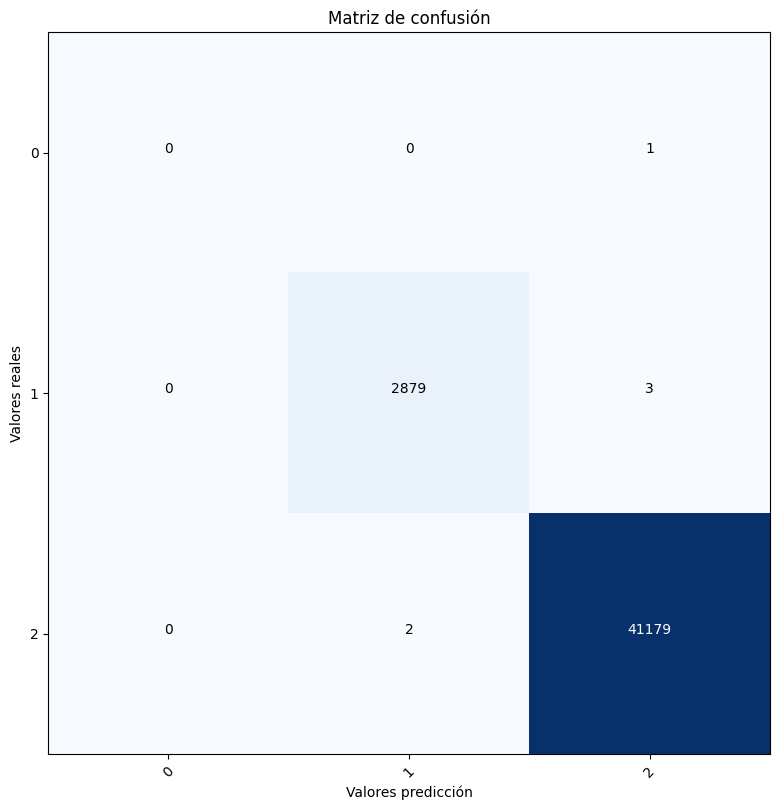

In [40]:
# Plot a confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(confusion_matrix(Y_validation, ypred), classes=['0', '1', '2'], normalize=False, title='Matriz de confusión')
plt.show()